In [139]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-video-game-sales/vgsales.csv


# **Imports and Libraries**

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Read the csv file**

In [141]:
df=pd.read_csv("/kaggle/input/global-video-game-sales/vgsales.csv")

In [142]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# **Data Cleaning and Processing**

In [143]:
coloumns_drop = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
df=df.drop(coloumns_drop,axis=1)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37


In [144]:
# Get initial stats for categorical data
games = df['Name'].unique()
platforms = df['Platform'].unique()
years = df['Year'].unique() 
genres = df['Genre'].unique()
publishers = df['Publisher'].unique()

print("Number of Unique Values in Categorical Columns")
print("Games: ",len(games))
print("Platforms: ",len(platforms))
print("Years: ",len(years))
print("Genres: ",len(genres))
print("Publishers: ",len(publishers))

Number of Unique Values in Categorical Columns
Games:  11493
Platforms:  31
Years:  40
Genres:  12
Publishers:  579


**Get Null count**

In [145]:
null_count = df.isnull().sum()
null_count[null_count > 0].sort_values(ascending=False)

Year         271
Publisher     58
dtype: int64

**Remove all NaN values**

In [151]:
df.dropna(inplace=True)

In [146]:
publisher_df = df['Publisher'].unique()
for i in publisher_df:
    print(i)

Nintendo
Microsoft Game Studios
Take-Two Interactive
Sony Computer Entertainment
Activision
Ubisoft
Bethesda Softworks
Electronic Arts
Sega
SquareSoft
Atari
505 Games
Capcom
GT Interactive
Konami Digital Entertainment
Sony Computer Entertainment Europe
Square Enix
LucasArts
Virgin Interactive
Warner Bros. Interactive Entertainment
Universal Interactive
Eidos Interactive
RedOctane
Vivendi Games
Enix Corporation
Namco Bandai Games
Palcom
Hasbro Interactive
THQ
Fox Interactive
Acclaim Entertainment
MTV Games
Disney Interactive Studios
nan
Majesco Entertainment
Codemasters
Red Orb
Level 5
Arena Entertainment
Midway Games
JVC
Deep Silver
989 Studios
NCSoft
UEP Systems
Parker Bros.
Maxis
Imagic
Tecmo Koei
Valve Software
ASCII Entertainment
Mindscape
Infogrames
Unknown
Square
Valve
Activision Value
Banpresto
D3Publisher
Oxygen Interactive
Red Storm Entertainment
Video System
Hello Games
Global Star
Gotham Games
Westwood Studios
GungHo
Crave Entertainment
Hudson Soft
Coleco
Rising Star Games
A

In [147]:
genre_df = df['Genre'].unique()
for i in genre_df:
    print(i)

Sports
Platform
Racing
Role-Playing
Puzzle
Misc
Shooter
Simulation
Action
Fighting
Adventure
Strategy


In [148]:
df.shape

(16598, 7)

In [149]:
df['Publisher'].value_counts().head(1)

Electronic Arts    1351
Name: Publisher, dtype: int64

In [150]:
print(df['Global_Sales'].isna().sum())
print( len(df. index))
df.head()

0
16598


,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37


**Convert and print first 4 digits of the col 'Year'**
**Removes decimal**

In [155]:
df['Year'] = df['Year'].apply(lambda x: (int(str(x)[0:4])))
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.37


# **Check cleaned data**

In [160]:
missing_values = df.isna().sum()
print(missing_values)

duplicates = df.duplicated()
print(duplicates)

data_type = df.dtypes
print(data_type)

summary_stats = df.describe()
print(summary_stats)

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
Global_Sales    0
dtype: int64
0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16291, dtype: bool
Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
Global_Sales    float64
dtype: object
               Rank          Year  Global_Sales
count  16291.000000  16291.000000  16291.000000
mean    8290.190228   2006.405561      0.540910
std     4792.654450      5.832412      1.567345
min        1.000000   1980.000000      0.010000
25%     4132.500000   2003.000000      0.060000
50%     8292.000000   2007.000000      0.170000
75%    12439.500000   2010.000000      0.480000
max    16600.000000   2020.000000     82.740000


# **Create visualization of the clean data**

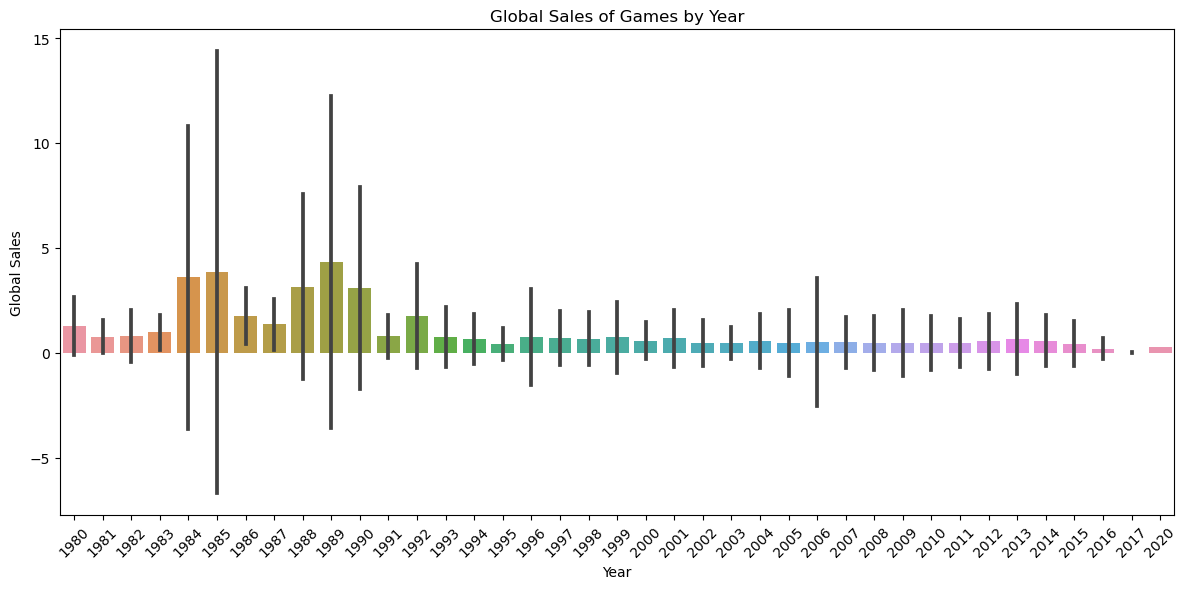

In [162]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Global_Sales', data=df, errorbar='sd')  # ci='sd' adds error bars
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.title('Global Sales of Games by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Upload clean data to another csv**

In [163]:
df.to_csv('Cleaned_vgame_sales.csv', index=False)